<hr style=" border:none; height:3px;">
<h1>
<center>Handwritten digit recognition on MNIST dataset</center>
</h1>
<hr style=" border:none; height:3px;">

<h1>Imports</h1>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# extract train and test data files
!unrar x '/content/MNIST.rar'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/MNIST.rar

Extracting  MNIST_train.csv                                               30% 61% 85%  OK 
Extracting  MNIST_test.csv                                                99%  OK 
All OK


In [3]:
# loading the data
train = pd.read_csv('/content/MNIST_train.csv')  
test = pd.read_csv('/content/MNIST_test.csv')

In [4]:
test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# split the data into features and target column
x_train = train.iloc[:, 1:].values
y_train = train.iloc[:, 0].values
x_test = test.iloc[:, 1:].values
y_test = test.iloc[:, 0].values

In [6]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"x_test shape: {y_test.shape}")

x_train shape: (60000, 784)
y_train shape: (60000,)
x_test shape: (10000, 784)
x_test shape: (10000,)


In [7]:
# rescale the images
x_train = x_train/255.0
x_test = x_test/255.0

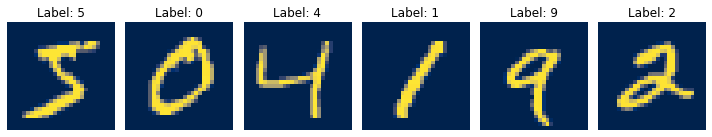

In [8]:
# visualize the data
fig, ax = plt.subplots(1,6, figsize=(10,10))
for i in range(6):
  ax[i].imshow(x_train[i].reshape(28, 28), cmap='cividis')
  ax[i].set_title(f'Label: {y_train[i]}')
  ax[i].axis('off')

plt.tight_layout()
plt.show()

<h1>Training a simple Neural Network</h1>

In [9]:
model = tf.keras.models.Sequential()
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,validation_data = (x_test, y_test),batch_size = 32, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2282 - accuracy: 0.9324 - val_loss: 0.1278 - val_accuracy: 0.9596
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0951 - accuracy: 0.9712 - val_loss: 0.0944 - val_accuracy: 0.9698
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0664 - accuracy: 0.9790 - val_loss: 0.0872 - val_accuracy: 0.9752
Epoch 4/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0504 - accuracy: 0.9843 - val_loss: 0.0741 - val_accuracy: 0.9761
Epoch 5/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0393 - accuracy: 0.9870 - val_loss: 0.0773 - val_accuracy: 0.9758
Epoch 6/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0334 - accuracy: 0.9888 - val_loss: 0.0799 - val_accuracy: 0.9758
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0262 - accuracy: 0.9912 - val_loss: 0.0879 - val_accuracy:

<h1>Model Performance Evaluation</h1>

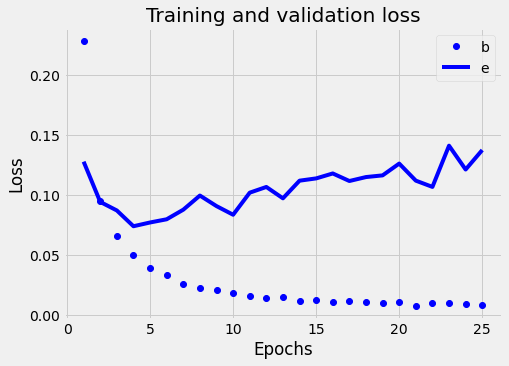

In [10]:
# summarize history for the loss
plt.style.use("fivethirtyeight")
plt.figure(figsize=(7,5))
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, (len(history.history['loss']) + 1))
plt.plot(epochs, train_loss,'o', color = 'b', label='Training loss')
plt.plot(epochs, val_loss,label='Validation loss', color = 'b')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend('best')
plt.show()

We can see that the validation loss started to increase after the third epoch, which means it sarted to overfit

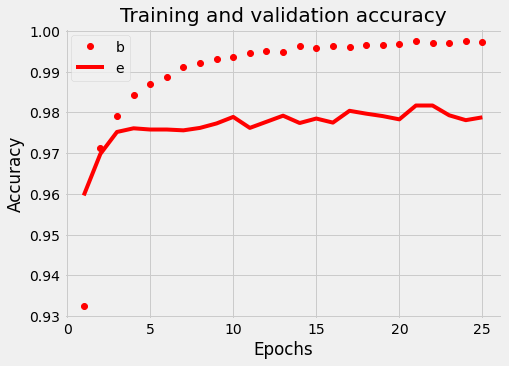

In [11]:
# summarize history for the accuracy
plt.figure(figsize=(7,5))
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, (len(history.history['loss']) + 1))
plt.plot(epochs, train_acc, 'o',color = 'red', label='Training Accuracy')
plt.plot(epochs, val_acc,color= 'red', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend('best')
plt.show()

We are gonna train the model for 3 epochs

In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,validation_data = (x_test, y_test),batch_size = 32, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2373 - accuracy: 0.9291 - val_loss: 0.1147 - val_accuracy: 0.9631
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0970 - accuracy: 0.9704 - val_loss: 0.1025 - val_accuracy: 0.9681
Epoch 3/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0676 - accuracy: 0.9788 - val_loss: 0.0790 - val_accuracy: 0.9759


In [13]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0790 - accuracy: 0.9759
0.07904349267482758
0.9758999943733215


The model achieved an accuracy of 97.58%, but we will try to improve it more so we will proceed using CNNs



<h1>Training a Convolutional Neural Network (CNN)</h1>

In [14]:
model = Sequential()   
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64, activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 32)      

In [15]:
train_data = x_train.reshape(60000,28,28)
test_data = x_test.reshape(10000,28,28)

es = EarlyStopping(monitor='val_loss', 
                                   mode='min', 
                                   patience=3,
                                   restore_best_weights=True)

history = model.fit(train_data, y_train,validation_data = (test_data, y_test),batch_size = 32,callbacks = [es], epochs=25)

Epoch 1/25
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2423 - accuracy: 0.9256 - val_loss: 0.0539 - val_accuracy: 0.9832
Epoch 2/25
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1028 - accuracy: 0.9691 - val_loss: 0.0409 - val_accuracy: 0.9858
Epoch 3/25
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0811 - accuracy: 0.9746 - val_loss: 0.0411 - val_accuracy: 0.9863
Epoch 4/25
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0717 - accuracy: 0.9778 - val_loss: 0.0311 - val_accuracy: 0.9898
Epoch 5/25
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0643 - accuracy: 0.9805 - val_loss: 0.0340 - val_accuracy: 0.9891
Epoch 6/25
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0596 - accuracy: 0.9815 - val_loss: 0.0317 - val_accuracy: 0.9896
Epoch 7/25
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0550 - accuracy: 0.9829 - val_loss: 0.0253 -

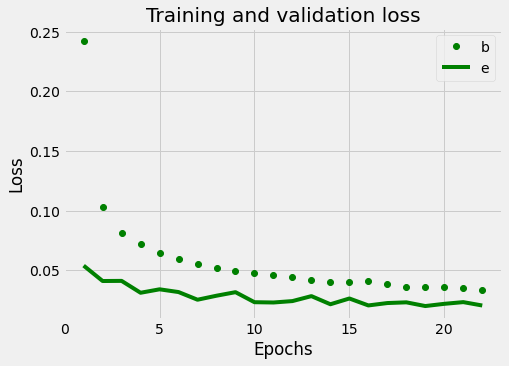

In [16]:
plt.figure(figsize=(7,5))
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, (len(history.history['loss']) + 1))
plt.plot(epochs, train_loss,'o', color = 'g', label='Training loss')
plt.plot(epochs, val_loss,label='Validation loss', color = 'g')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend('best')
plt.show()

In [17]:
val_loss, val_acc = model.evaluate(test_data, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0200 - accuracy: 0.9940
0.019954249262809753
0.9940000176429749


we can see that the Accuracy increased and the loss decreased compared to the simple Neural Net, We have reached an acuracy of 99,4%.